<a href="https://colab.research.google.com/github/kishlay511/Projects/blob/main/Learnbay_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Importing Basic Library

import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

import sklearn
import scipy

In [2]:
data = pd.read_csv('Data.csv')

In [3]:
# Data Preprocessing : check missing data 

data.isnull().sum()

Ware_house_ID                       0
WH_Manager_ID                       0
Location_type                       0
WH_capacity_size                    0
zone                                0
WH_regional_zone                    0
num_refill_req_l3m                  0
transport_issue_l1y                 0
Competitor_in_mkt                   0
retail_shop_num                     0
wh_owner_type                       0
distributor_num                     0
flood_impacted                      0
flood_proof                         0
electric_supply                     0
dist_from_hub                       0
workers_num                       990
wh_est_year                     11881
storage_issue_reported_l3m          0
temp_reg_mach                       0
approved_wh_govt_certificate      908
wh_breakdown_l3m                    0
govt_check_l3m                      0
product_wg_ton                      0
dtype: int64

In [4]:
data.nunique()

Ware_house_ID                   25000
WH_Manager_ID                   25000
Location_type                       2
WH_capacity_size                    3
zone                                4
WH_regional_zone                    6
num_refill_req_l3m                  9
transport_issue_l1y                 6
Competitor_in_mkt                  12
retail_shop_num                  4906
wh_owner_type                       2
distributor_num                    56
flood_impacted                      2
flood_proof                         2
electric_supply                     2
dist_from_hub                     217
workers_num                        60
wh_est_year                        28
storage_issue_reported_l3m         37
temp_reg_mach                       2
approved_wh_govt_certificate        5
wh_breakdown_l3m                    7
govt_check_l3m                     32
product_wg_ton                   4561
dtype: int64

In [5]:
# Droping columns with Index ID 

data.drop(columns = 'Ware_house_ID', inplace = True)

In [6]:
data.drop(['WH_Manager_ID'], axis=1, inplace = True)

In [7]:
data['workers_num'].describe()

count    24010.000000
mean        28.944398
std          7.872534
min         10.000000
25%         24.000000
50%         28.000000
75%         33.000000
max         98.000000
Name: workers_num, dtype: float64

In [8]:
# Fill null value with mean as maximumn data lies in range 

data['workers_num'].fillna(data['workers_num'].mean(), inplace = True)

In [9]:
# Droping column as 50% data are null looking no relation with target 

data.drop(columns = 'wh_est_year', inplace = True)

In [10]:
# Checking unique values to fill null 

data['approved_wh_govt_certificate'].value_counts()

C     5501
B+    4917
B     4812
A     4671
A+    4191
Name: approved_wh_govt_certificate, dtype: int64

In [11]:
# Use forward fill to avoid imbalance dataset

data['approved_wh_govt_certificate'] = data['approved_wh_govt_certificate'].ffill()

In [12]:
data['approved_wh_govt_certificate'].value_counts()

C     5719
B+    5094
B     4974
A     4855
A+    4358
Name: approved_wh_govt_certificate, dtype: int64

In [13]:
# Converting columns to 'int' data type

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 21 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Location_type                 25000 non-null  object 
 1   WH_capacity_size              25000 non-null  object 
 2   zone                          25000 non-null  object 
 3   WH_regional_zone              25000 non-null  object 
 4   num_refill_req_l3m            25000 non-null  int64  
 5   transport_issue_l1y           25000 non-null  int64  
 6   Competitor_in_mkt             25000 non-null  int64  
 7   retail_shop_num               25000 non-null  int64  
 8   wh_owner_type                 25000 non-null  object 
 9   distributor_num               25000 non-null  int64  
 10  flood_impacted                25000 non-null  int64  
 11  flood_proof                   25000 non-null  int64  
 12  electric_supply               25000 non-null  int64  
 13  d

In [14]:
data["Location_type"] = data["Location_type"].apply(lambda x: 1 if x == 'Urban' else 0)

In [15]:
data = pd.get_dummies(data, columns = ['WH_capacity_size'])

In [16]:
data

,Location_type,zone,WH_regional_zone,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,retail_shop_num,wh_owner_type,distributor_num,flood_impacted,...,workers_num,storage_issue_reported_l3m,temp_reg_mach,approved_wh_govt_certificate,wh_breakdown_l3m,govt_check_l3m,product_wg_ton,WH_capacity_size_Large,WH_capacity_size_Mid,WH_capacity_size_Small
0,1,West,Zone 6,3,1,2,4651,Rented,24,0,...,29.000000,13,0,A,5,15,17115,0,0,1
1,0,North,Zone 5,0,0,4,6217,Company Owned,47,0,...,31.000000,4,0,A,3,17,5074,1,0,0
2,0,South,Zone 2,1,0,4,4306,Company Owned,64,0,...,37.000000,17,0,A,6,22,23137,0,1,0
3,0,North,Zone 3,7,4,2,6000,Rented,50,0,...,21.000000,17,1,A+,3,27,22115,0,1,0
4,0,North,Zone 5,3,1,2,4740,Company Owned,42,1,...,25.000000,18,0,C,6,24,24071,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24995,0,North,Zone 1,3,0,4,5390,Rented,19,0,...,34.000000,22,1,A,2,30,32093,0,0,1
24996,0,West,Zone 2,6,0,4,4490,Company Owned,57,0,...,28.000000,10,0,B,4,18,12114,0,1,0
24997,1,South,Zone 5,7,0,2,5403,Rented,31,1,...,28.944398,23,0,B+,5,25,27080,1,0,0
24998,0,North,Zone 1,1,0,2,10562,Rented,25,0,...,25.000000,18,0,A,6,30,25093,0,0,1


In [17]:

data = pd.get_dummies(data, columns = ['zone'])

In [18]:

data = pd.get_dummies(data, columns = ['WH_regional_zone'])

In [19]:
data = pd.get_dummies(data, columns = ['wh_owner_type'])

In [20]:
data = pd.get_dummies(data, columns = ['approved_wh_govt_certificate'])

In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 36 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Location_type                    25000 non-null  int64  
 1   num_refill_req_l3m               25000 non-null  int64  
 2   transport_issue_l1y              25000 non-null  int64  
 3   Competitor_in_mkt                25000 non-null  int64  
 4   retail_shop_num                  25000 non-null  int64  
 5   distributor_num                  25000 non-null  int64  
 6   flood_impacted                   25000 non-null  int64  
 7   flood_proof                      25000 non-null  int64  
 8   electric_supply                  25000 non-null  int64  
 9   dist_from_hub                    25000 non-null  int64  
 10  workers_num                      25000 non-null  float64
 11  storage_issue_reported_l3m       25000 non-null  int64  
 12  temp_reg_mach     

In [23]:
x = data.iloc[:,:-1]
y = data.iloc[:,-1]

In [24]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_sc = sc.fit_transform(x)
x_sc

array([[ 3.35214954, -0.41780748,  0.18869048, ..., -0.45948118,
        -0.49837447, -0.50586831],
       [-0.29831605, -1.56874998, -0.64504266, ..., -0.45948118,
        -0.49837447, -0.50586831],
       [-0.29831605, -1.18510248, -0.64504266, ..., -0.45948118,
        -0.49837447, -0.50586831],
       ...,
       [ 3.35214954,  1.11678253, -0.64504266, ..., -0.45948118,
        -0.49837447,  1.97679908],
       [-0.29831605, -1.18510248, -0.64504266, ..., -0.45948118,
        -0.49837447, -0.50586831],
       [-0.29831605,  1.50043003,  1.02242363, ..., -0.45948118,
        -0.49837447,  1.97679908]])

<AxesSubplot:>

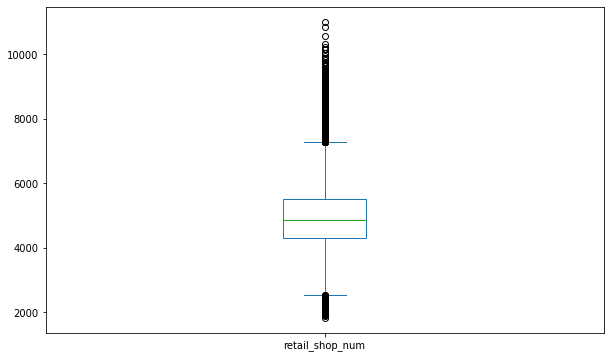

In [41]:
plt.figure(figsize=(10,6))
data.retail_shop_num.plot(kind = 'box')

<AxesSubplot:>

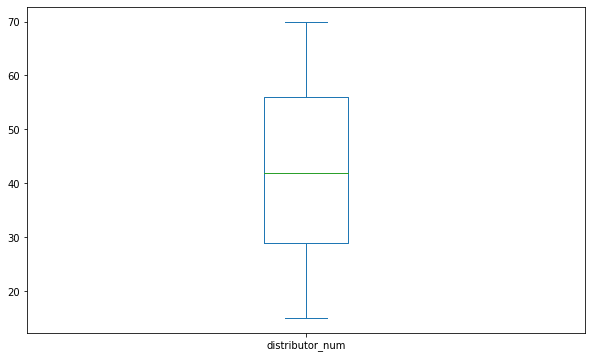

In [42]:
plt.figure(figsize=(10,6))
data.distributor_num.plot(kind = 'box')

<AxesSubplot:>

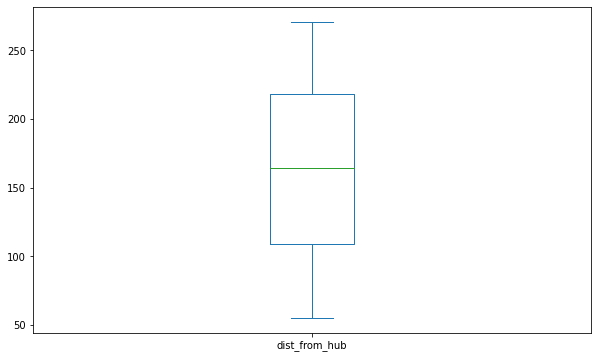

In [43]:
plt.figure(figsize=(10,6))
data.dist_from_hub.plot(kind = 'box')

In [40]:
 # Model Building 
 data

,Location_type,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,retail_shop_num,distributor_num,flood_impacted,flood_proof,electric_supply,dist_from_hub,...,WH_regional_zone_Zone 4,WH_regional_zone_Zone 5,WH_regional_zone_Zone 6,wh_owner_type_Company Owned,wh_owner_type_Rented,approved_wh_govt_certificate_A,approved_wh_govt_certificate_A+,approved_wh_govt_certificate_B,approved_wh_govt_certificate_B+,approved_wh_govt_certificate_C
0,1,3,1,2,4651,24,0,1,1,91,...,0,0,1,0,1,1,0,0,0,0
1,0,0,0,4,6217,47,0,0,1,210,...,0,1,0,1,0,1,0,0,0,0
2,0,1,0,4,4306,64,0,0,0,161,...,0,0,0,1,0,1,0,0,0,0
3,0,7,4,2,6000,50,0,0,0,103,...,0,0,0,0,1,0,1,0,0,0
4,0,3,1,2,4740,42,1,0,1,112,...,0,1,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24995,0,3,0,4,5390,19,0,0,1,142,...,0,0,0,0,1,1,0,0,0,0
24996,0,6,0,4,4490,57,0,0,1,130,...,0,0,0,1,0,0,0,1,0,0
24997,1,7,0,2,5403,31,1,0,1,147,...,0,1,0,0,1,0,0,0,1,0
24998,0,1,0,2,10562,25,0,0,1,60,...,0,0,0,0,1,1,0,0,0,0


In [26]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state= 100)

In [27]:
print (x_test.shape, y_test.shape )
print (x_train.shape, y_train.shape)

(6250, 35) (6250,)
(18750, 35) (18750,)


In [28]:
import numpy as np 
import pandas as pd
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Perceptron
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [29]:
# Create model using Perceptron 
per_model = Perceptron(random_state = 101)
per_model.fit(x_train, y_train)

Perceptron(random_state=101)

In [30]:
y_pred_train = per_model.predict(x_train)
y_pred_test = per_model.predict(x_test)

In [31]:
# accuracy_score, confusion_matrix, classification_report
print (classification_report(y_train, y_pred_train))
print ("######"*20)
print (classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.77      1.00      0.87     14465
           1       0.31      0.00      0.00      4285

    accuracy                           0.77     18750
   macro avg       0.54      0.50      0.44     18750
weighted avg       0.67      0.77      0.67     18750

########################################################################################################################
              precision    recall  f1-score   support

           0       0.77      1.00      0.87      4816
           1       0.10      0.00      0.00      1434

    accuracy                           0.77      6250
   macro avg       0.44      0.50      0.44      6250
weighted avg       0.62      0.77      0.67      6250



In [34]:
# accuracy_score, confusion_matrix, classification_report
print (accuracy_score(y_train, y_pred_train))
print ("######"*20)
print (accuracy_score(y_test, y_pred_test))

0.7709333333333334
########################################################################################################################
0.76928


In [37]:
knn = Perceptron()
knn.fit(x_train,y_train)
print('What is Testing Accuracy')
print (knn.score(x_test,y_test))
print('What is Traning Accuracy')
print (knn.score(x_train,y_train))
predicted = knn.predict(x_test)

What is Testing Accuracy
0.77056
What is Traning Accuracy
0.7714666666666666


In [38]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn import svm
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
# from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import seaborn as sns
import pydotplus

In [44]:
model_dt_2 = DecisionTreeClassifier(random_state=1,max_depth=2)

model_dt_2.fit(x_train,y_train)

model_dt_2_score_train = model_dt_2.score(x_train,y_train)

model_dt_2_score_test = model_dt_2.score(x_test,y_test)

print('Training Score',model_dt_2_score_train)

print('Testing Score',model_dt_2_score_test)

Training Score 0.7714666666666666
Testing Score 0.77056


In [46]:
model_dt_4 = DecisionTreeClassifier(random_state=1,max_depth=4)

model_dt_4.fit(x_train,y_train)

model_dt_4_score_train = model_dt_4.score(x_train,y_train)

model_dt_4_score_test = model_dt_4.score(x_test,y_test)

print('Training Score',model_dt_4_score_train)

print('Testing Score',model_dt_4_score_test)

Training Score 1.0
Testing Score 1.0


In [47]:
model_dt_6 = DecisionTreeClassifier(random_state=1,max_depth=6)

model_dt_6.fit(x_train,y_train)

model_dt_6_score_train = model_dt_6.score(x_train,y_train)

model_dt_6_score_test = model_dt_6.score(x_test,y_test)

print('Training Score',model_dt_6_score_train)

print('Testing Score',model_dt_6_score_test)

Training Score 1.0
Testing Score 1.0
